<center><img src="media/imagenes/Banner.png" width = 1000></center>

Este notebook pretende enseñar el resultado de todas las implementaciones sin meterse mucho en los detalles de la implementación. Pretende ser una guía visual e interactiva, para entender todas las decisiones de diseño que hemos tomado en el proyecto. Está pensado para ser ejecutado celda a celda salvo que se diga lo contrario.

In [1]:
import dependencias
from pprint import pprint

pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Módulo 1: Presentación del Problema y Estrategias Algorítmicas

## La idea

La idea de **SENOLLOP** surgió a raíz del Dilema del Prisionero Iterado. Queríamos desarrollar agentes que interactuaran con un entorno más complejo que el DPI. Así, se nos ocurrió empezar a experimentar con el conocido juego Snake.

Lo primero que teníamos que crear era el territorio, el lugar donde se moverían nuestras serpientes, y de donde se podría sacar información para que los agentes supieran qué hay en el territorio; lo llamaremos **estado**.

In [7]:
estado = dependencias.Game_state(5, (5, 5))
print(estado)
print(estado.state_matrix())

O  * 
     
  *  
   * 
   **

[[2. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 3. 3.]]


Todos los agentes deben poder reaccionar a todos los estados de modo que dado un agente y un estado se debe generar una jugada.

In [9]:
from dependencias.Agentes.Random_Agent import *

agente = RandomAgent()
estado = dependencias.Game_state(5, (5, 5))
agente.get_action(estado)

(0, 1)

Cada movimiento es una tupla de la forma (x, y) donde x e y son la diferencia de la posición de la cabeza de la serpiente con la posición de la cabeza de la misma en el siguiente turno.

Un game es lo que regula las normas del juego y gestiona todos los elementos, generando y actualizando los game states en función de las normas tradicionales que conocemos del snake original.

In [30]:
game = dependencias.Snake_game((5, 5), 5, agente)

Por último, necesitábamos un entorno de simulaciones, para visualizar los resultados. Tenemos 4 visualizaciones distintas:

In [31]:
# Representacion ascii de la partida
game.play()

O    
  *  
 *   
    *
 **  



In [32]:
# Evalúa n partidas y da estadísticas sobre el desempeño del agente
game.evaluar()

100%|██████████| 100/100 [00:00<00:00, 33322.51it/s]


{'puntuacion_media': np.float64(1.41),
 'puntuacion_maxima': np.int64(6),
 'puntuacion_minima': np.int64(1),
 'movimientos_medios': np.float64(2.99),
 'movimientos_maximos': np.int64(20),
 'movimientos_minimos': np.int64(1),
 'movimientos por puntuacion': 2,
 'proporcion_del_tablero_ocupada': np.float64(0.06)}

In [33]:
# Un método para comparar dos agentes y decidir cuál es mejor mediante evaluaciones de n partidas

agente_2 = RandomAgent()
dependencias.enfrentar(agente, agente_2, n_partidas=100)

100%|██████████| 100/100 [00:00<00:00, 5072.63it/s]

         Estadisticas          |    Agente 1     |    Agente 2    
------------------------------ | --------------- | ---------------
puntuacion_media               |      1.06       |   ((*1.06*))   
puntuacion_maxima              |     ((*3*))     |        2       
puntuacion_minima              |        1        |     ((*1*))    
movimientos_medios             |   ((*5.96*))    |      4.99      
movimientos_maximos            |    ((*113*))    |       94       
movimientos_minimos            |        1        |     ((*1*))    
movimientos por puntuacion     |        6        |     ((*5*))    
proporcion_del_tablero_ocupada |       0.0       |    ((*0.0*))   
------------------------------ | --------------- | ---------------


In [38]:
# Una visualización con pygame para ver cómo se comporta el agente en tiempo real
game.play_with_pygame()

# Puede que se cierre inmediatamente porque el agente es muy malo, ya podremos visualizar partidas más adelante.

<img src="media/imagenes/euristicos.png" style="float: right;">

## Agentes Basados en Heurísticas.

Los agentes que vamos a enseñar en este apartado son agentes que se basan en una política de recompensa para decidir qué movimiento realizar en cada turno, están implementados mediante una clase abstracta que tiene los siguientes métodos:

- get_reward: Calcula la recompensa asociada a cada movimiento en función de una política de recompensa.
- get_action: Calcula la mejor acción a realizar en función de la recompensa obtenida.

De este modo podemos empezar a jugar con el agente y ver cómo se comporta.<br>
A continuación vamos a enseñar los agentes que hemos implementado y cómo se comportan en el juego.



### Agentes Chaser

La política de recompensa de este agente se basa en la distancia entre la cabeza de la serpiente y la comida más cercana, de este modo el agente siempre intentará acercarse a la comida, aunque esto implique que la serpiente se muera.

<center><img src="media/imagenes/chasser.png" style="float: center;"></center>

In [39]:
agente_chaser = dependencias.Agentes.ChaserAgent()  # Invocamos el agente

In [41]:
# Ejecuta esta celda para ver cómo se comporta el agente en distintos escenarios. Puedes modificar los parámetros del juego.

SIZE = (15, 15)
N_FOODS = 5

game = dependencias.Snake_game(SIZE, N_FOODS, agente_chaser)
game.play_with_pygame()

In [42]:
estadisticas = game.evaluar()  # Vemos estadísticas del agente
pprint(estadisticas)

100%|██████████| 100/100 [00:00<00:00, 1477.21it/s]

{'movimientos por puntuacion': 5,
 'movimientos_maximos': np.int64(117),
 'movimientos_medios': np.float64(32.41),
 'movimientos_minimos': np.int64(6),
 'proporcion_del_tablero_ocupada': np.float64(0.03),
 'puntuacion_maxima': np.int64(24),
 'puntuacion_media': np.float64(7.01),
 'puntuacion_minima': np.int64(3)}


#### Conclusiones

Este agente logra su objetivo de llegar muy rápido a por la comida (movimientos por puntuación), pero no consigue sobrevivir mucho tiempo.

#### Mejoras

Este agente podría ser mejorado si se le añade una penalización por muerte inmediata.

### Agentes Avoider

La política de recompensa de este agente se basa en evitar las muertes inmediatas, ya sea contra la serpiente o contra las paredes, asociando una penalización a estos movimientos.

<center><img src="media/imagenes/inminent.png" style="float: center;"></center>

In [43]:
agente_avoider = dependencias.Agentes.Avoid_inmediate_death()

In [46]:
# Ejecuta esta celda para ver cómo se comporta el agente  (ciérrala cuando te aburras, no muere ni come)
SIZE = (15, 15)
N_FOODS = 5

game = dependencias.Snake_game(SIZE, N_FOODS, agente_avoider)
game.play_with_pygame()

In [45]:
estadisticas = game.evaluar()
pprint(estadisticas)

100%|██████████| 100/100 [00:00<00:00, 392.18it/s]

{'movimientos por puntuacion': 62,
 'movimientos_maximos': np.int64(1796),
 'movimientos_medios': np.float64(618.13),
 'movimientos_minimos': np.int64(121),
 'proporcion_del_tablero_ocupada': np.float64(0.04),
 'puntuacion_maxima': np.int64(18),
 'puntuacion_media': np.float64(10.04),
 'puntuacion_minima': np.int64(5)}


#### Conclusiones

Este agente mejora mucho su tiempo de vida, pero no consigue alcanzar la comida de manera eficiente.

#### Mejoras

Ademas vemos que con evitar muertes inmediatas no es suficiente, puesto que hay escenarios en los que te puedes quedar encerrado.

### Combinacion de agentes

Esta implementación de los agentes tan particular, nos permite combinar las recompensas que le dan a cada movimiento distintos agentes para conseguir un agente que se comporte de una manera más eficiente. Sumando las heurísticas, con pesos ponderados, obtenemos resultados finales con los que elegir la siguiente opción.

<img src="media/imagenes/combinado.png" style="display: block; margin: auto;" width="400">



In [47]:
chouder = dependencias.Agentes.Combined_agent((agente_avoider, agente_chaser), (1, 0.5))

In [48]:
# Ejecuta esta celda para ver como se comporta el agente
game = dependencias.Snake_game((15, 15), 5, chouder)
game.play_with_pygame()

In [49]:
estadisticas = game.evaluar()
pprint(estadisticas)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 203.17it/s]

{'movimientos por puntuacion': 5,
 'movimientos_maximos': np.int64(393),
 'movimientos_medios': np.float64(178.05),
 'movimientos_minimos': np.int64(42),
 'proporcion_del_tablero_ocupada': np.float64(0.15),
 'puntuacion_maxima': np.int64(68),
 'puntuacion_media': np.float64(32.86),
 'puntuacion_minima': np.int64(9)}


#### Conclusiones

El comportamiento de este agente es mucho mejor que el de los agentes individuales, y parece una buena estrategia para el inicio del juego.

#### Mejoras

El agente sigue sin ser capaz de evitar quedarse encerrado, hay que añadir una heurística más a futuro para evitar este tipo de situaciones.

<img src="media/imagenes/encerrado.png" style="display: block; margin: auto;" width="400">

*NOTA: En el ejemplo moverse a la derecha provoca una muerte inevitable pero el agente no lo considera una mala jugada.*

### Políticas basadas en búsqueda en anchura (Estrategias a largo plazo)

Para hacer decisiones a largo plazo se nos plantean dos opciones:

- Fuerza bruta (Exploración en estados): podemos ver a donde nos lleva una combinación de movimientos y ver cuál es mejor.

*Problema: el espacio de estados es muy grande y no podemos explorar todas las posibilidades, tendríamos que seleccionar una profundidad máxima y explorar hasta ahí. Además ralentizaría cada simulación.*

- Búsqueda en anchura: Lanzando búsqueda en anchura desde los movimientos posibles en cada turno, podemos ver cuál es el mejor movimiento a largo plazo, evaluando algunas características del tablero.

A continuación desarrollamos agentes basados en búsqueda en anchura, para solucionar problemas de muerte a largo plazo.

#### Agentes Searcher

Este agente lanza 3 búsquedas en anchura, empezando en cada una las casillas accesibles en el siguiente movimiento, aprovecha para contar el número de casillas accesibles en cada caso y asigna una puntuación a cada movimiento en función de este valor.

$$ W = \frac{\text{casillas accesibles en el movimiento}}{\text{total casillas accesibles}}
$$

*De este modo premiamos los movimientos que te llevan a los espacios abiertos*


<img src="media/imagenes/searcher.png" style="display: block; margin: auto;" width="400">

In [50]:
agente_searcher = dependencias.Agentes.Busqueda_anchura()
game = dependencias.Snake_game((15, 15), 5, agente_searcher)

In [51]:
# Ejecuta esta celda para ver como se comporta el agente (no hace nada por sí solo)

game.play_with_pygame()

A continuación definimos una mezcla de los 3 agentes anteriores, para ver cómo se comporta en el juego.

In [52]:
agente_searcher = dependencias.Agentes.Busqueda_anchura()
agente_avoider = dependencias.Agentes.Avoid_inmediate_death()
agente_chaser = dependencias.Agentes.ChaserAgent()

deep_chouder = dependencias.Agentes.Combined_agent((agente_avoider, agente_chaser, agente_searcher), (1, 0.2, 3))
game = dependencias.Snake_game((15, 15), 5, deep_chouder)

In [53]:
# Ejecuta esta celda para ver como se comporta el agente

game.play_with_pygame()

##### Comportamiento del agente

El comportamiento de este agente es muy bueno, consigue sobrevivir mucho tiempo y llegar a la comida de manera eficiente, además cuando se queda encerrado sigue ocupando espacio hasta generar una salida y una vez existe es capaz de escapar generando muchas huídas interesantes.

In [54]:
# Lo comparamos con el agente que desarrollamos antes.
# Esta celda puede tardar un poco en ejecutarse, se recomienda simplemente mirar los resultados. (Se recomienda)

dependencias.enfrentar(deep_chouder, chouder, n_partidas=100)

100%|██████████| 100/100 [00:00<00:00, 203.15it/s]

         Estadisticas          |    Agente 1     |    Agente 2    
------------------------------ | --------------- | ---------------
puntuacion_media               |   ((*80.59*))   |      34.21     
puntuacion_maxima              |    ((*123*))    |       70       
puntuacion_minima              |    ((*51*))     |       10       
movimientos_medios             |   ((*552.2*))   |      187.6     
movimientos_maximos            |    ((*977*))    |       378      
movimientos_minimos            |    ((*242*))    |       52       
movimientos por puntuacion     |        7        |     ((*5*))    
proporcion_del_tablero_ocupada |   ((*0.36*))    |      0.15      
------------------------------ | --------------- | ---------------


Estas estadísticas muestran que deep_chouder es un agente mucho mejor que chouder, consigue sobrevivir mucho más tiempo y llegar a más comida. Sin embargo, lógicamente chouder es más eficiente y crece mas rápido.

##### Conclusiones

Deep_chouder es **sustancialente** mejor que chouder, sin embargo cuando la partida alcanza una cantidad alta de comida, surge un problema. Como todo está tan lleno, el agente prefiere quedarse encerrado cuando en realidad este movimiento claramente lo lleva a morir.

A continuación, vamos a desarrollar una estrategia con búsqueda en anchura que cumpla el mismo objetivo a partir de otra idea.

#### Agentes Tail Chasser

Este agente se basa en la idea de que si el agente tiene acceso a la cola entonces puede crear un ciclo, de modo que el agente mientras no se salga del ciclo puede seguir vivo infinitamente. Parece que encontrar comida en este ciclo da problemas. Sin embargo, no es el caso porque para el caso más extremo (en el que tienes una comida e inmediatamente despues la cola) el agente come y se pega a la cola, pero no llega nunca a chocarse (ya que ocupa el espacio que ocupaba la cola en el turno anterior). El agente presenta este comportamiento en la práctica muchas veces, entonces lanzaremos búsqueda en anchura y premiaremos los movimientos que nos permitan llegar a la cola.



<div style="text-align: center;">
    <img src="media/imagenes/aclaracion.png" style="display: inline-block; margin: auto;" width="250">
    <img src="media/imagenes/tail_chasser.png" style="display: inline-block; margin: auto;" width="250">
</div>

*NOTA: aclarar que en la imagen 1 el movimiento "arriba" es válido, ya que la cola tambien se mueve.* <br>
*Vemos que si tienes acceso a la cola entonces no te puedes quedar encerrado.*

In [55]:
tail_chasser = dependencias.Agentes.Tail_Chasser()
game = dependencias.Snake_game((15, 15), 5, tail_chasser)

In [56]:
# Ejecuta esta celda para ver como se comporta el agente  (Cierra cuando te aburras)

game.play_with_pygame() # Esta estrategia solo se puede ver si la serpiente es suficientemente larga por lo que tardara en mostrar comportamientos interesantes por si sola.

Vamos a incorporar esta estrategia a Deep_chouder para ver como se comporta:

In [57]:
agente_avoider = dependencias.Agentes.Avoid_inmediate_death()
agente_chaser = dependencias.Agentes.ChaserAgent()
agente_tail_chasser = dependencias.Agentes.Tail_Chasser()
agente_searcher = dependencias.Agentes.Busqueda_anchura()

deep_loopy_looper = dependencias.Agentes.Combined_agent((agente_avoider,
                                                         agente_chaser,
                                                         agente_searcher,
                                                         agente_tail_chasser),
                                                        
                                                        (1, 0.2, 2, 1))

game = dependencias.Snake_game((15, 15), 5, deep_loopy_looper)

In [58]:
# Ejecuta esta celda para ver como se comporta el agente

game.play_with_pygame()

In [ ]:
dependencias.enfrentar(deep_loopy_looper, deep_chouder, n_partidas=100)

# Esta celda tarda bastante en ejecutar, se recomienda simplemente mirar los resultados.

100%|██████████| 100/100 [01:12<00:00,  1.39it/s]

         Estadisticas          |    Agente 1     |    Agente 2    
------------------------------ | --------------- | ---------------
puntuacion_media               |   ((*88.42*))   |      79.88     
puntuacion_maxima              |    ((*140*))    |       114      
puntuacion_minima              |       52        |    ((*53*))    
movimientos_medios             |  ((*633.37*))   |     548.53     
movimientos_maximos            |   ((*1206*))    |       903      
movimientos_minimos            |    ((*346*))    |       343      
movimientos por puntuacion     |        7        |     ((*7*))    
proporcion_del_tablero_ocupada |   ((*0.44*))    |      0.24      
------------------------------ | --------------- | ---------------


**Deep_loopy_looper** se coloca en cabeza, puesto que es en general mejor que Deep_chouder.

*NOTA: Este tipo de agentes parece que mueren consistentemente cuando desobedecen la política de tail_chasser. Parece buena idea darle mucho peso, pero esto puede dar lugar a bucles infinitos, que hasta ahora no están gestionados.*


<img src="media/imagenes/vacio.png" style="display: block; margin: auto;" width="200">

*Además este agente recubre aproximadamente la mitad del tablero pero la eficiencia de su empaquetado es bastante mala. Quizás podríamos implementar una política que rellene mejor los espacios.*

### Filler

Esta política se basa en premiar los movimientos que tengan partes de la serpiente adyacentes. De este modo, se elegirán menos movimientos que separan a la serpiente demasiado de su propio cuerpo, a no ser que esto esté justificado por otras políticas.

In [61]:
import dependencias

filler = dependencias.Agentes.Filler()

# No tiene mucho sentido a estas alturas probar los agentes por separado, vamos a generan una combinación.

In [62]:
agente_avoider = dependencias.Agentes.Avoid_inmediate_death()
agente_chaser = dependencias.Agentes.ChaserAgent()
agente_tail_chasser = dependencias.Agentes.Tail_Chasser()
agente_searcher = dependencias.Agentes.Busqueda_anchura()
filler = dependencias.Agentes.Filler()

filete = dependencias.Agentes.Combined_agent((           agente_avoider,
                                                         agente_chaser,
                                                         agente_searcher,
                                                         agente_tail_chasser,
                                                         filler),
                                                        
                                                        (1, 0.3, 2, 0.5, 0.3))

game = dependencias.Snake_game((15, 15), 5, filete)

In [63]:
# Ejecuta esta celda para ver como se comporta el agente

game.play_with_pygame()

In [ ]:
dependencias.enfrentar(filete, deep_loopy_looper, n_partidas=10)

100%|██████████| 10/10 [00:11<00:00,  1.13s/it]

         Estadisticas          |    Agente 1     |    Agente 2    
------------------------------ | --------------- | ---------------
puntuacion_media               |   ((*97.0*))    |      87.6      
puntuacion_maxima              |       110       |    ((*115*))   
puntuacion_minima              |    ((*74*))     |       67       
movimientos_medios             |   ((*911.9*))   |      622.6     
movimientos_maximos            |   ((*1196*))    |       845      
movimientos_minimos            |    ((*706*))    |       454      
movimientos por puntuacion     |        9        |     ((*7*))    
proporcion_del_tablero_ocupada |   ((*0.43*))    |      0.39      
------------------------------ | --------------- | ---------------


Parece que **Filete** se comporta mejor que Deep_loopy_looper, pero de nuevo da problemas con tema bucles y conflictos con Chasser. Por lo tanto lo siguiente que haremos es implementar una política para evitar ciclos.

<img src="media/imagenes/filete.png" style="display: block; margin: auto;" width="200">

*NOTA: Lo que sí que es muy prometedor es observar cómo se comporta el agente, claramente es capaz de gestionar mejor el espacio.*

### Cycle_detector

Esta política no hace nada hasta que detecta que la serpiente ha completado un ciclo idéntico (dos subsecuencias idénticas en las secuencias de movimientos). A continuación, añadimos premios con el objetivo de salir del ciclo. Si ocurre, dejaremos de premiar de nuevo. Una vez se detecta el bucle tenemos dos maneras de continuar:

- (matar al agente) -> Premiando cualquier movimiento en el que el agente termina muriendo. Esto nos permite diseñar estrategias con riesgo de quedarse en bucle, y que no se queden en bucle. Sin embargo, dará lugar a partidas atípicas en las que se llegue a un bucle al principio y el agente muera.

- (premiar searcher y añadir aleatoriedad) -> Hemos observado que searcher es eficaz saliendo de bucles ya que nos llevará a una casilla que aparentemente será segura. Esto es más costoso, por lo que veremos si merece la pena.

Vamos a implementar ambas estrategias y a compararlas.

In [65]:
import dependencias

agente_avoider = dependencias.Agentes.Avoid_inmediate_death()
agente_chaser = dependencias.Agentes.ChaserAgent()
agente_tail_chasser = dependencias.Agentes.Tail_Chasser()
agente_searcher = dependencias.Agentes.Busqueda_anchura()
filler = dependencias.Agentes.Filler()
cycle_detector = dependencias.Agentes.Cycle_detector(avoid_skipable_loops=False)
cycle_destroyer = dependencias.Agentes.Cycle_detector(avoid_skipable_loops=True)

fileton = dependencias.Agentes.Combined_agent(  # Mata al agente en caso de bucle
    agentes=(agente_tail_chasser,
             agente_chaser,
             agente_avoider,
             filler,
             agente_searcher,
             cycle_detector), 
    weights=(10, 0.5, 0.55, 0.05, 0, 100))

senollop = dependencias.Agentes.Combined_agent(  # Premia searcher en caso de bucle
    agentes=(agente_tail_chasser,
             agente_chaser,
             agente_avoider,
             filler,
             agente_searcher,
             cycle_destroyer), 
    weights=(10, 0.5, 0.55, 0.05, 0, 100))

In [ ]:
dependencias.enfrentar(senollop, fileton, n_partidas=50)

# Esta celda tarda en ejecutar, recomendado mirar los resultados.

100%|██████████| 50/50 [01:59<00:00,  2.38s/it]

         Estadisticas          |    Agente 1     |    Agente 2    
------------------------------ | --------------- | ---------------
puntuacion_media               |  ((*216.58*))   |     210.48     
puntuacion_maxima              |    ((*223*))    |       222      
puntuacion_minima              |    ((*202*))    |       20       
movimientos_medios             | ((*12507.58*))  |     3599.86    
movimientos_maximos            |   ((*43919*))   |      6488      
movimientos_minimos            |   ((*2896*))    |       151      
movimientos por puntuacion     |       58        |    ((*17*))    
proporcion_del_tablero_ocupada |   ((*0.96*))    |      0.94      
------------------------------ | --------------- | ---------------


Como se puede ver, el parámetro *avoid_skipable_loops=True* mejora el comportamiento de los loops que se producen al principio de la partida, imposibilitando las muertes prematuras.

### Senollop - Agente Definitivo

Ajustando los hiperparámetros, hemos conseguido el agente definitivo **Senollop**. En las siguientes celdas puedes ejecutarlo para ver su comportamiento. (Merece la **pena**)

In [67]:
import dependencias

agente_avoider = dependencias.Agentes.Avoid_inmediate_death()
agente_chaser = dependencias.Agentes.ChaserAgent()
agente_tail_chasser = dependencias.Agentes.Tail_Chasser()
agente_searcher = dependencias.Agentes.Busqueda_anchura()
filler = dependencias.Agentes.Filler()
cycle_detector = dependencias.Agentes.Cycle_detector(avoid_skipable_loops=False)
cycle_destroyer = dependencias.Agentes.Cycle_detector(avoid_skipable_loops=True)

senollop = dependencias.Agentes.Combined_agent(
    agentes=(agente_tail_chasser, agente_chaser, agente_avoider, filler, agente_searcher, cycle_destroyer), weights=(10, 0.5, 0.55, 0.05, 0, 100))

game = dependencias.Snake_game((15, 15), 5, senollop)

In [68]:
# Ejecuta esta celda para ver como se comporta el agente

game.play_with_pygame()

In [ ]:
game.evaluar()

100%|██████████| 100/100 [03:53<00:00,  2.33s/it]


{'puntuacion_media': np.float64(208.73),
 'puntuacion_maxima': np.int64(224),
 'puntuacion_minima': np.int64(10),
 'movimientos_medios': np.float64(3733.93),
 'movimientos_maximos': np.int64(5154),
 'movimientos_minimos': np.int64(54),
 'movimientos por puntuacion': 18,
 'proporcion_del_tablero_ocupada': np.float64(0.93)}

## Hemos Ganado?

Hagamos algunas pruebas para ver los resultados finales.

### Tablero 5 x 5

In [78]:
# Ejecuta esta celda para ver como se comporta el agente
game_1 = dependencias.Snake_game((5, 5), 5, senollop)
game_1.play_with_pygame()  # Recibe un mensaje si gana

SENOLLOP HA GANADO GRACIAS POR JUGAR


In [79]:
game_1.evaluar()

 19%|█▉        | 19/100 [00:00<00:00, 179.89it/s]

SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR


 55%|█████▌    | 55/100 [00:00<00:00, 173.31it/s]

SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR


100%|██████████| 100/100 [00:00<00:00, 173.39it/s]

SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR
SENOLLOP HA GANADO GRACIAS POR JUGAR


{'puntuacion_media': np.float64(23.45),
 'puntuacion_maxima': np.int64(25),
 'puntuacion_minima': np.int64(4),
 'movimientos_medios': np.float64(96.19),
 'movimientos_maximos': np.int64(122),
 'movimientos_minimos': np.int64(13),
 'movimientos por puntuacion': 4,
 'proporcion_del_tablero_ocupada': np.float64(0.94)}

Este tablero lo gana muy a menudo y tiene resultados óptimos.

### Tablero 10 x 10

In [80]:
# Ejecuta esta celda para ver como se comporta el agente
game_2 = dependencias.Snake_game((10, 10), 5, senollop)

game_2.play_with_pygame()

In [87]:
game_2.evaluar()  # En tableros más grandes gana menos (es normal)

  7%|▋         | 7/100 [00:01<00:15,  5.85it/s]

SENOLLOP HA GANADO GRACIAS POR JUGAR


 80%|████████  | 80/100 [00:14<00:03,  6.29it/s]

SENOLLOP HA GANADO GRACIAS POR JUGAR


 92%|█████████▏| 92/100 [00:16<00:01,  5.48it/s]

SENOLLOP HA GANADO GRACIAS POR JUGAR


100%|██████████| 100/100 [00:17<00:00,  5.64it/s]


{'puntuacion_media': np.float64(94.03),
 'puntuacion_maxima': np.int64(100),
 'puntuacion_minima': np.int64(14),
 'movimientos_medios': np.float64(821.19),
 'movimientos_maximos': np.int64(1270),
 'movimientos_minimos': np.int64(70),
 'movimientos por puntuacion': 9,
 'proporcion_del_tablero_ocupada': np.float64(0.94)}

El 10 x 10 tambien lo gana bastante.

### Tablero 15 x 15

Durante todo este proceso conseguimos ganar el 15 x 15 en dos ocasiones, logrando el preciado 225.

<div style="text-align: center;">
    <img src="media/imagenes/win_1.png" style="display: inline-block; margin: auto;" width="400">
    <img src="media/imagenes/win_2.png" style="display: inline-block; margin: auto;" width="400">
</div>
 

### Tablero 17 x 15

Por último vamos a evaluar el comportamiento en el problema que lo inició todo. Esas clases de programación aburridas, dónde necesibas algo que hacer, y el humilde **snake** de google (17 x 15) te ayudaba a pasar el rato...

<img src="media/imagenes/google.png" style="display: block; margin: auto;" width="200">

In [88]:
game_3 = dependencias.Snake_game((15, 17), 5, senollop)  # Recreamos tablero

In [ ]:
# Ejecuta esta celda para ver como se comporta el agente

game_3.play_with_pygame()

In [89]:
game_3.evaluar()

100%|██████████| 100/100 [05:16<00:00,  3.17s/it]


{'puntuacion_media': np.float64(243.13),
 'puntuacion_maxima': np.int64(254),
 'puntuacion_minima': np.int64(206),
 'movimientos_medios': np.float64(4431.51),
 'movimientos_maximos': np.int64(7137),
 'movimientos_minimos': np.int64(2831),
 'movimientos por puntuacion': 18,
 'proporcion_del_tablero_ocupada': np.float64(0.95)}

## Playground

Aquí puedes jugar a crear tus propios agentes y ver cómo se comportan en el juego, los parámetros que se dan son los de senollop puedes probar:

- crear agentes
- llenar el mapa de comida
- cambiar el tamaño del tablero (muy grande muy pequeño)

In [ ]:
WEIGHTS =(10, 0.5, 0.55, 0.05, 0, 100)
SIZE = (15, 15)
N_FOODS = 5
N_EVALUACIONES = 100

In [ ]:
import dependencias

agente_avoider = dependencias.Agentes.Avoid_inmediate_death()
agente_chaser = dependencias.Agentes.ChaserAgent()
agente_tail_chasser = dependencias.Agentes.Tail_Chasser()
agente_searcher = dependencias.Agentes.Busqueda_anchura()
filler = dependencias.Agentes.Filler()
cycle_detector = dependencias.Agentes.Cycle_detector(avoid_skipable_loops=False)
cycle_destroyer = dependencias.Agentes.Cycle_detector(avoid_skipable_loops=True)

agente_custom = dependencias.Agentes.Combined_agent(
    agentes=(agente_tail_chasser, agente_chaser, agente_avoider, filler, agente_searcher, cycle_destroyer), weights=WEIGHTS)

game = dependencias.Snake_game(SIZE, N_FOODS, senollop)

In [ ]:
game.play_with_pygame()

In [ ]:
game.evaluar()

# Módulo 2: Reinforcement Learning

Queríamos investigar y profundizar en el área del Aprendizaje Reforzado porque nos parece muy interesante el hecho de que un agente aprenda a jugar sin darle realmente instrucciones sobre la dinámica del juego. El agente busca maximizar una función de calidad y equilibrar los pesos de una red neuronal para que la recompensa obtenida sea máxima en cada paso, todo esto mediante prueba/error y simulaciones del escenario. 

Específicamente en el juego de Snake creemos que puede tener una implementación bastante beginner-friendly para hacer nuestra primera toma de contacto en este campo, ya que el juego tiene unas premisas relativamente sencillas.

Nos gustaría recalcar que los modelos que han sido entrenados mediante aprendizaje reforzado solo están hechos para un entorno de una manzana debido a la definición y estructura de sus redes neuronales.

Primero nos gustaría profundizar en cómo surge la idea de aprendizaje por refuerzo, introduciendo sus componentes más importantes. Este apartado será más denso en contenido que el resto del notebook, pero es para tener una visión más o menos intuitiva de cómo funciona. También hemos creado varios modelos y los hemos evaluado para ver su rendimiento. 

## 1. Teoría

Para este apartado nos hemos inspirado principalmente en la playlist [Reinforcement Learning](https://www.youtube.com/playlist?list=PLZbbT5o_s2xoWNVdDudn51XM8lOuZ_Njv), de [deeplizard](https://www.youtube.com/@deeplizard). Es la que hemos visto para estudiar desde cero el algoritmo que utilizamos.

### 1.1. Procesos de Decisión de Markov

Los problemas de aprendizaje reforzado frecuentemente se estructuran como un Proceso de Decisión de Markov (o MDP). Este está compuesto por un conjunto de estados $S$, un conjunto de acciones $A$ y un conjunto de recompensas $R$.

Un estado $s_t\in S$ describe el entorno en un instante $t$ específico.
Teniendo en cuenta ese estado, el agente selecciona una acción a tomar $a_t\in A$, lo que nos da lo que podemos llamar como el par estado-acción $(s_t, a_t)$.

Después de la acción $s_t$, vamos al paso ${t+1}$ y al estado $s_{t+1}$, en el que recibimos una recompensa $r_{t+1}\in R$ por la acción $a_t$ tomada en el estado $s_t$. 
Podemos pensar en este proceso como una función que mapea los pares con las recompensas: 
$$f(s_t, a_t) = r_{t+1}$$

Ejemplo con nuestro juego:

<center><img src="media/imagenes/rl/rl-snake-0.png" height = 200 width = 200> <img src="media/imagenes/rl/flecha.png" height = 200 width = 200> <img src="media/imagenes/rl/rl-snake-1.png" height = 200 width = 200> <figcaption></figcaption></center>

La figura de la izquierda representa el estado $s_t$; viendo el entorno, el agente decide tomar la acción $a_t$ (ir hacia la derecha) y el estado cambia al $s_{t+1}$ (figura de la derecha). Como se come una manzana, la recompensa $r_{t+1}$ es $1$. Por lo que en este caso $f(s_t,a_t) = 1$.

Esto se repite una vez obtenida la recompensa tantas veces como queramos. <center><img src="media/imagenes/rl/rl-diagram.png"><figcaption>Diagrama del proceso MDP</figcaption> </center> 

### 1.2. Retorno Esperado

El retorno esperado $G$, es la suma de recompensas obtenidas desde el estado actual hasta el final de la partida. Para que las recompensas futuras tengan un menor impacto que las inmediatas, se usa un factor de descuento $0\lt \gamma \lt 1$. Cuando está cerca de 1, el algoritmo valora más las recompensas a largo plazo y cuando está cerca de 0, el algoritmo valora casi exclusivamente las recompensas inmediatas. 
Esta función de retorno con el gamma se llama retorno descontado, su fórmula es: $$G_{t} = R_{t+1} + \gamma R_{t+2} + {\gamma}^2R_{t+3} + \ldots = R_{t+1} + \gamma G_{t+1}$$
En el Snake, el agente debe aprender a sobrevivir y obtener comida el mayor tiempo posible. Si $\gamma=1$, la serpiente se preocupará por mantener una trayectoria que le permita comer y evitar muertes incluso a largo plazo. Si γ es muy bajo, la serpiente se enfocará en los alimentos sin tener en cuenta si le lleva a la muerte.

<center><img src="media/imagenes/rl/rl-gamma.png" height = 250 width = 250> <center/> 

En este caso, si la serpiente tiene un gamma de, por ejemplo, 0.3, irá a por la fruta sin tener en cuenta que después no tendrá espacio para escapar y morirá, por lo que la reward no habrá servido para nada. 

Sin embargo, si tiene un gamma de 1, mirará si le es factible ir a por la fruta; como ve que moriría, decide enrollarse primero y, luego, ir a por la fruta una vez tiene hueco para salir.

### 1.3. Políticas y funciones de valor.

A partir de ahora a los estados $s_t$ los podremos denominar $s$ y, los estados $s_{t+1}$, $s'$. Lo mismo con las acciones.

La política $\pi$ es la estrategia que sigue el agente para decidir qué acción tomar en cada estado. 

Es la pieza clave del agente en el MDP.

La función de valor $v_\pi(s)$ indica qué tan bueno es un estado $s$ si seguimos la política $\pi$. 

Finalmente, la función de valor de acción-estado $q_\pi(s, a)$ indica qué tan bueno es elegir una acción $a$ de un estado $s$ siguiendo la política $\pi$. 
En resumen: da el valor de una acción  siguiendo  $\pi$.
Su fórmula es: $$q_\pi(s, a) = E[G_t | s_t, a_t]$$ A este valor se le llama q-valor y es la función que vamos a maximizar en el entrenamiento de la red neuronal.

En Snake, la política indicaría si, estando en un cierto lugar y teniendo la comida en determinada posición, conviene moverse hacia arriba para buscar ese alimento o desviarse para no chocar con el borde. Las funciones de valor permiten cuantificar esos estados y acciones de forma comparativa.

<center><img src="media/imagenes/rl/state_action_value.png" height = 250 width = 250> <center/> 

En este caso vemos el q-valor de los dos movimientos más factibles de la serpiente. Con una política bastante buena debería de tomar la decisión de ir hacía arriba, ya que ir hacia la fruta puede ser más perjudicial.

### 1.4. Políticas óptimas.

El objetivo final del aprendizaje por refuerzo es encontrar una política óptima $\pi^*$
que maximiza el retorno esperado. Dicho de otro modo, queremos encontrar la secuencia de decisiones (movimientos en Snake) que conduzca al mayor número de recompensas acumuladas a lo largo del tiempo.

En Snake, una política óptima sería aquella que, dadas las posiciones de la serpiente y la comida, decida cómo moverse para alargar la vida y comer de la manera más consistente posible.

La política óptima tiene una función de acción-valor óptima $q^*_\pi(s, a) = max_{\pi}q_\pi (s,a)$, que devuelve el mayor retorno esperado conseguible por cualquier política $\pi$ para cualquier par estado-acción posible.

Una propiedad fundamental de $q^*(s,a)$ es que satisface la ecuación de optimalidad de Bellman: $$q^*_{\pi}(s, a) = E[R_{t+1} + \gamma max_{a'}q^*(s',a')$$
donde:
- $R_{t+1}$ es la recompensa inmediata recibida al pasar del estado $s$ al estado $s′$ con la acción a (+1 si comemos una manzana, -1 si morimos, etc.);
- $\gamma$ es el factor de descuento que pondera la importancia de las recompensas futuras;
- $max_{a'}q^*(s',a')$ selecciona la acción $a'$ que maximiza la función de acción-valor óptima en el siguiente estado alcanzado, $s'$.

Esta describe cómo el valor óptimo en un estado se relaciona con los valores en los estados siguientes. 

En términos del snake, la interpretación es:

Se recibe una recompensa inmediata por la acción elegida,
se proyecta cuál podría ser el siguiente mejor valor de acción en el nuevo estado, tomando el mayor $q^*$ disponible.
Se combina la recompensa actual con ese máximo valor futuro (pesado por γ).
La idea es que la serpiente, al realizar cada movimiento, no solo evalúe la recompensa inmediata (comer o no comer), sino también cuánto podría ganar a largo plazo (seguir viva para comer más adelante). 

Conforme vaya haciendo cada movimiento va a ir actualizando los valores $q$, las acciones que maximicen $q^*$ acabarán reflejando la política óptima: la forma de moverse que, en conjunto, genere mayor retorno acumulado en el juego.

Os preguntaréis cómo va a actualizarse $q^*$, aquí es dónde introduciremos el algoritmo que usaremos.


<center><img src="media/imagenes/rl/state_action_value.png" height = 250 width = 250> 
<img src="media/imagenes/rl/suboptima.png" height = 250 width = 250> <center/>  

Usemos el mismo ejemplo del apartado anterior.

En la figura de la izquierda veríamos una política más óptima que la de la derecha.
Esto es debido a que yendo hacia arriba hay "más probabilidades" de sobrevivir y, por lo tanto, conseguir un mayor reward a la larga.

### 1.5. Q-Learning

Es un método fundamental en el Aprendizaje por Refuerzo para aprender la función de acción-valor óptima, sin necesidad de una política estricta predefinida. Se considera un algoritmo fuera de política (off-policy) porque aprende de la mejor acción posible independientemente de la política actual empleada para explorar.

El agente mantiene una tabla de valores $Q(s, a)$, donde cada entrada representa el valor estimado de realizar la acción $a$ en el estado $s$. Partimos de valores iniciales (0 o aleatorios) y, en cada paso, cuando el agente está en un estado $s$, toma una acción $a$, obtiene una recompensa $r$ y salta al estado siguiente $s'$. A partir de esa experiencia, ajusta la entrada $Q(s, a)$ usando la ecuación de actualización del Q-Learning:
$$ Q(s, a) = Q(s, a) + \alpha [r + \gamma max(Q(s', a')) − Q(s, a)], $$
Donde $\alpha$ es la tasa de aprendizaje.

Así, para Snake, con una tabla $Q$ de todos los estados posibles, podríamos seleccionar la acción que maximiza $Q(s, a)$.
Estos son los pasos para cada iteración:
1. La serpiente observa su estado actual $s$ (posición de la cabeza, comida, etc.).
2. Selecciona una acción $a$ (moverse arriba, abajo, izquierda o derecha) de acuerdo con alguna política de exploración (por ejemplo, $\epsilon-greedy$).
3. Cuando ejecuta la acción, recibe una recompensa inmediata $r'$.
4. La serpiente pasa a un nuevo estado $s'$.
5. Se actualiza la tabla $Q$ para $Q(s, a)$ usando la fórmula anterior, incorporando la recompensa y la estimación de $\max_{a'} q(s', a')$.

Al repetir este proceso de forma iterativa y explorando distintos movimientos, la tabla $Q$ converge hacia una aproximación de $q^*(s,a)$, reflejando la utilidad real de cada acción. 

De ese modo, en partidas futuras, si la serpiente se encuentra en un estado parecido, se guiará por los mejores valores de Q, evitando muros con mayor probabilidad y priorizando comer la manzana cuando resulte más valioso a largo plazo.

<center><img src="media/imagenes/rl/q-learning.png" height = 400 width = 400> <center/> 

Este es un gran ejemplo de cómo funciona una Q-Table. Supongamos una tabla. En las filas están los estados y en las columnas las acciones.
Cuando llegamos a un estado, por ejemplo $s_2$, miramos todos los valores de las columnas $1,...,3$ en la fila $2$. La acción que tenga el máximo de estos valores será la elegida y, según la recompensa, este valor será actualizado, ya sea aumentando o disminuyendo (también existe el caso en el que no ocurre nada).  

En el ejemplo de los puntos 1.3 y 1.4 veríamos que en ese estado los movimientos ir hacia abajo y a la derecha tendrían q-valores de 0 o negativos, ir a la derecha de 0.25 e ir hacia arriba de 0.75, por lo que eligiríamos ir hacia arriba.

### 1.6. Política de exploración $\epsilon-greedy$

Como hemos nombrado en el paso 1.5.2, al principio se usa una estrategia de exploración-explotación.

Cuando usamos un algoritmo como Q-Learning, el agente necesita una manera de balancear entre:
- Explorar (probar acciones nuevas o aparentemente menos prometedoras)
- Explotar (escoger siempre la acción con el valor $Q$ más alto que se ha aprendido).

Si el agente solo explota, corre el riesgo de quedarse con una política que no sea la mejor, porque no ha probado suficientes opciones. En cambio, si el agente explora demasiado, no aprovechará lo que ya ha aprendido y se comportará de forma aleatoria. Para solucionar esto, se emplea normalmente la sencilla estrategia $\epsilon-greedy$:

Con probabilidad $\epsilon$, se elige una acción aleatoria (exploración).
Con probabilidad $1 − \epsilon$, se elige la acción que maximiza el valor $Q$ del estado actual (explotación).

```
p = random()
if p < ε:
    explorar
else:
    explotar
```

Ajuste de $\epsilon$ a lo Largo del Entrenamiento
- Al principio, conviene tener un $\epsilon$ grande (por ejemplo, 1.0 o 0.9). De este modo, la serpiente explora acciones distintas y se hace una idea variada de cómo reaccionar en cada situación.
- Conforme transcurre el entrenamiento y la serpiente “aprende” acciones efectivas, se reduce $\epsilon$ para que explote más a menudo los movimientos que maximizan $Q(s, a)$.

En Snake:
- Al principio, la serpiente se moverá de forma bastante aleatoria, intentando arriba/abajo cuando tal vez la comida está claramente a la derecha. Esto abre la posibilidad de descubrir rutas inesperadas que resulten favorables a largo plazo.
- Pasado un tiempo, a medida que $Q(s, a)$ converge, la serpiente aprende una preferencia clara por ciertas acciones en estados determinados (es decir, va derecho a la comida o gira en la dirección apropiada), y disminuimos $\epsilon$ para que aproveche dicho conocimiento.

<center><img src="media/imagenes/rl/graficagod.png" height = 600 width = 1000> <center/> 

Aquí hemos hecho el entrenamiento de una serpiente y hemos ploteado cómo el exploit adelanta al explore cuando baja el épsilon, así como el score promedio aumenta. Aquí se ve bien el impacto del $\epsilon-greedy$.

### 1.7. Deep Q-Learning con Experience Replay

En escenarios con muchos estados o representaciones más complejas (como un tablero grande en Snake, donde cada celda puede ocupar diferentes posiciones de la serpiente y comida), la tabla $Q$ se vuelve inmanejable. Aquí entra en juego el Deep Q-Learning (DQN), que sustituye la tabla $Q$ por una Red Neuronal, capaz de aproximar $q(s, a)$ incluso cuando el espacio de estados es muy amplio.

Arquitectura Básica de la DQN
- Entrada: Se alimenta a la red con una representación del estado de Snake (por ejemplo, la posición de la serpiente, la ubicación de la comida y posibles colisiones).
- Salida: La red produce un conjunto de valores $q(s, a)$ (uno por cada acción: arriba, abajo, izquierda, derecha).
- Optimización: Ajustamos los pesos de la red para que la diferencia entre las predicciones de $q$ y los valores de destino (targets) sea mínima.

Un problema con el aprendizaje directo de secuencias es que los datos están correlacionados temporalmente, lo que puede desestabilizar la red. Para solucionarlo, se guarda la experiencia en un buffer (Replay Buffer) que contiene transiciones de la forma $(s, a, r, s', partida terminada)$. Luego se toma un mini-lote aleatorio (batch) de ese buffer en cada paso de entrenamiento. De esta forma se “rompe” la correlación de las muestras, haciendo que el entrenamiento sea más estable y el agente reutiliza experiencias pasadas, extrayendo más información de cada jugada.

Entrenamiento con Deep Q-Learning:

- El agente observa el estado actual. Selecciona una acción $a$ (usando la política $\epsilon-greedy$), la serpiente se mueve, recibe una recompensa y pasa a un nuevo estado s'. 
- Se almacena la transición ($s, a, r, s′, partidaterminada$) en el Replay Buffer.
- Periódicamente, se muestrean lotes aleatorios del Replay Buffer para entrenar la DQN. Para cada transición del lote, se calcula el valor, objetivo y se compara con la salida de la red.
- Se realiza retropropagación del error y ajuste de los pesos.

Al repetir este proceso en miles (o millones) de pasos, la red aprende a aproximar de forma estable $q(s, a)$. Esto le permite a la serpiente reconocer patrones en el tablero y actuar con mayor precisión en situaciones que no serían factibles de enumerar en una tabla tradicional.

<center><img src="media/imagenes/rl/diferencias.png" height = 300 width = 600> <center/> 

Aquí vemos la diferencia visual entre el Q-Learning y el Deep Q-Learning, como vemos la estructura puede parecer muy distinta pero en realidad es la misma.

<center><img src="media/imagenes/rl/buffer.png" height = 400 width = 600> <center/> 

También aquí podemos ver muy visualmente cómo funciona el buffer de experiencias y cómo va sacando minibatches para entrenar todavía más el agente con experiencias pasadas aleatorias para que no tengan correlación directa y generalice mejor.

### 1.8. Última mejora: Red objetivo para estabilizar el entrenamiento

Cuando se entrena una Red Neuronal Profunda para aproximar la función de acción-valor $q(s, a)$, es fundamental mantener la estabilidad en las actualizaciones de los pesos de la red. Sin una estrategia adecuada, las actualizaciones continuas pueden llevar a que la red oscile o diverja, impidiendo que el agente aprenda de manera efectiva. Para abordar este desafío, se introduce la Red Objetivo (Target Network).

Es una copia de la red neuronal principal (Q Network) que se utiliza para calcular los valores de referencia (targets) durante el entrenamiento. La idea principal es proporcionar una función objetivo más estable al mantener los pesos de la Red Objetivo fijos por un número determinado de iteraciones, en lugar de actualizarlos continuamente como ocurre con la Red Principal.

- Sin una Red Objetivo, la función objetivo $q(s, a)$ se basa en la misma red que está siendo optimizada. Esto puede llevar a una retroalimentación circular donde los cambios en la red afectan directamente a los targets, causando inestabilidad.
- Al mantener fija la Red Objetivo por múltiples actualizaciones, se disminuyen las fluctuaciones en los valores objetivo, permitiendo que la Red Principal aprenda de manera más gradual y consistente.
- Con una Red Objetivo estable, es más probable que el algoritmo de optimización converja hacia una solución óptima, ya que las actualizaciones de peso no son impulsadas por cambios simultáneos en la función objetivo.

Nuevo entrenamiento de Deep Q-Learning con Target Network:

- Crear dos redes neuronales: Red Principal $ NN_{\text{q-net}} $ y Red Objetivo $ NN_{\text{target-net}} $ con los mismos pesos iniciales.

- El agente juega Snake, eligiendo acciones basadas en la política $\epsilon $-greedy derivada de $ NN_{\text{q-net}} $.

- Cada transición (estado, acción, recompensa, siguiente estado) se almacena en el Experience Replay Buffer.

- Se toman muestras aleatorias del buffer y se calculan los targets utilizando la Red Objetivo.
La Red Principal se entrena para minimizar la diferencia entre sus predicciones y los targets.

- Cada cierto número de pasos $\theta_{\text{target-net}} \leftarrow \theta_{\text{q-net}}$, actualizar los pesos de la Red Objetivo para que coincidan con los de la Red Principal.

- Continuar iterando sobre los pasos anteriores hasta que la Red Principal aprenda una función $ q $ que guíe al agente hacia una política óptima.

<center><img src="media/imagenes/rl/otragraficachula.jpg" height = 400 width = 500><img src="media/imagenes/rl/diagramachulo.png" height = 400 width = 500> <center/> 

Aquí tenemos dos gráficas. La primera enseña el diagrama general de todo el proceso y la segunda enseña cómo se entrena  específicamente la red neuronal con la Target Network. Se ve que los q-valores de la Target Network son tomados como valor objetivo en la función de pérdida a minimizar de la Q-Network.

## 2. Distintas implementaciones probadas en python

Para este apartado nos hemos inspirado en el el video [Deep Q Learning is Simple with PyTorch](https://youtu.be/wc-FxNENg9U?si=jkjxqWBJNMrh5cuu), de [Machine Learning with Phil](https://www.youtube.com/@MachineLearningwithPhil). Ha servido como guía para programar tanto el agente como la red neuronal DQN.

In [90]:
import dependencias
import dependencias.juego_base_rl as juegorl
from dependencias.Agentes.deep_q_agent import state_function_8n, state_function_15, plot_scores_function, train_rl_agent, state_big_matrix 

### 2.1 Agente de Reinforcement Learning con modelo de Deep Q-Networks.
#### State: State Matrix

Aquí probamos que los estados sean las matrices enteras del juego. Es decir, si el área de juego es en un 10x10, la entrada en la red neuronal es de 100.

Probamos con distintos parámetros pero ninguno provocaba una notable mejora.

In [91]:
# Parámetros del juego
x, y = 10, 10

# Parámetros del agente
dqnagent_matrix = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.0005,
    input_dim=x*y,  
    hidden_dim = 128,
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='new_checkpoints',
    state_function=state_big_matrix    
)

game1 = juegorl.Snake_game((x, y), 1, dqnagent_matrix)

In [93]:
# Distintas variables para la función de entrenamiento, que servirán para plotear los resultados
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

**Si la serpiente se queda en bucle, simplemente cierra la pestaña, porque le quitamos el epsilon para que sea completamente explotación y nada de exploración, así no hay errores.**

<Figure size 640x480 with 0 Axes>

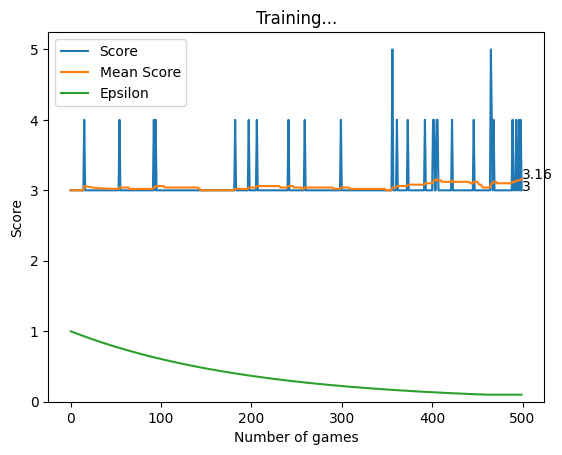

In [94]:
# Función creada por nosotros para entrenar el agente y para jugar, guardar y plotear los resultados cada x episodios. Además también guarda un modelo del agente.
# Cada 250 iteraciones muestra un agente entrenado y actualiza el gráfico de información 

train_rl_agent(500, 250, game1, dqnagent_matrix,state_big_matrix , n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)

Vemos que hay una ligera mejoría pero realmente lo hemos probado con muchos epochs y se queda estancado en score 3.

Además, cuando el épsilon se pone en 0 realmente se ve que no ha aprendido nada.

In [114]:
dqnagent_matrix.epsilon = 0  # Establecemos en 0 el epsilon (eliminamos la posibilidad de explorar)

game1.state.reset() # Jugar con el agente entrenado (no es muy bueno)
game1.play_with_pygame()

Si realizamos un game.evaluar() con un epsilon distinto de 0 se queda en bucle en muchas ocasiones así que vemos que es un modelo bastante poco útil. Además las veces que no se queda en bucle muere al instante.

In [100]:
dqnagent_matrix.epsilon = 0.01
game1.evaluar(100)

100%|██████████| 100/100 [00:00<00:00, 299.45it/s]


{'puntuacion_media': np.float64(3.17),
 'puntuacion_maxima': np.int64(5),
 'puntuacion_minima': np.int64(3),
 'movimientos_medios': np.float64(19.62),
 'movimientos_maximos': np.int64(238),
 'movimientos_minimos': np.int64(4),
 'movimientos por puntuacion': 6,
 'proporcion_del_tablero_ocupada': 0.03}

In [101]:
dqnagent_matrix.epsilon = epsilon_original  # Ejecutar para restaurar el valor de epsilon original del agente

### 2.2. Agente de Reinforcement Learning con modelo de Deep Q-Networks.
#### State: 8 Neuronas

En este caso decidimos disminuir en gran cantidad el número de neuronas de entrada. Decidimos colocar solo 8 neuronas, que están distribuidas de la siguiente manera:
- 4 Neuronas de peligros inmediatos. Para saber en qué direcciones tiene muerte directa.
- 4 Neuronas de dirección de comida. En este caso si nuestra cabeza está en (2,2) y la comida en (3,4) significa que está hacia la derecha y hacia abajo. 


In [102]:
dqnagent8n = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.001,
    input_dim=8,          # Updated input_dim
    hidden_dim=128,
    n_actions=4,      
    batch_size=128,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='new_checkpoints',
    state_function=state_function_8n
)


In [103]:
game2 = juegorl.Snake_game((10, 10), 1, dqnagent8n)

In [104]:
n_games = 0   # Parámetros para plotear
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

<Figure size 640x480 with 0 Axes>

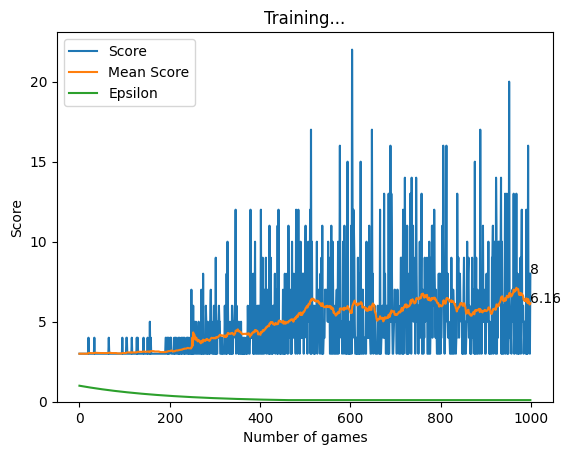

In [106]:
train_rl_agent(750, 250, game2, dqnagent8n, state_function_8n, n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)  # Entrenamiento
# Cierra las simulaciones si entra en bucle

En este modelo con tan solo 8 neuronas sí que vemos un proceso de aprendizaje de la red, hasta que se queda en torno a los 4.5-6.

Sin embargo, esta media es engañosa porque al tener un épsilon de 0.1, siguen habiendo un 2.5% de probabilidades de que se mate a sí misma en cada paso.

Si jugamos con un épsilon de 0 vemos que no es para nada el caso y que en realidad consigue puntajes bastante elevados.

In [113]:
dqnagent8n.epsilon = 0  # Establecemos en 0 el epsilon (eliminamos la posibilidad de explorar)

game2.state.reset()
game2.play_with_pygame()

In [115]:
game2.evaluar(100)

100%|██████████| 100/100 [00:02<00:00, 48.61it/s]


{'puntuacion_media': np.float64(22.2),
 'puntuacion_maxima': np.int64(40),
 'puntuacion_minima': np.int64(10),
 'movimientos_medios': np.float64(175.07),
 'movimientos_maximos': np.int64(391),
 'movimientos_minimos': np.int64(56),
 'movimientos por puntuacion': 8,
 'proporcion_del_tablero_ocupada': 0.17}

Aquí podemos ver que incluso ha llegado a 40 de puntuación y tiene una media de 20 de puntuación por partida.

### 2.3. Agente de Reinforcement Learning con modelo de Deep Q-Networks.
#### State: 15 Neuronas

Este es el último modelo probado, en el que el input que ponemos es de 15 neuronas. Están de la siguiente manera:

- 3 neuronas de peligro: Esta vez solo mira los peligros que tiene delante (la dirección a la que está mirando) y a los lados. Hacia detrás no hace falta porque ya aprende sola la red con la experiencia. Esto es porque da igual la combinación que tenga, tirar hacia detrás será castigo de 1 punto siempre.
- 4 neuronas de dirección: Indica la dirección a la que está yendo la serpiente. Es básicamente un one-hot en el que si va hacia arriba 
- 4 neuronas de dirección de comida: Igual que antes, en qué direcciones se encuentra la comida.
- 4 neuronas de búsqueda en anchura: Mira a todas la direcciones cuál es la que tiene más espacios accesibles. Evita bastante el hecho de que se meta dentro de su propio cuerpo y se muera sola.

In [116]:
dqnagent15n = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.0005,
    input_dim=15,          # Updated input_dim
    hidden_dim=256,
    n_actions=4,      
    batch_size=128,
    mem_size=50000,
    target_update_freq=100,
    checkpoint_dir='new_checkpoints',
    state_function=state_function_15
)

In [117]:
game3 = juegorl.Snake_game((10, 10), 1, dqnagent15n)

In [118]:
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

<Figure size 640x480 with 0 Axes>

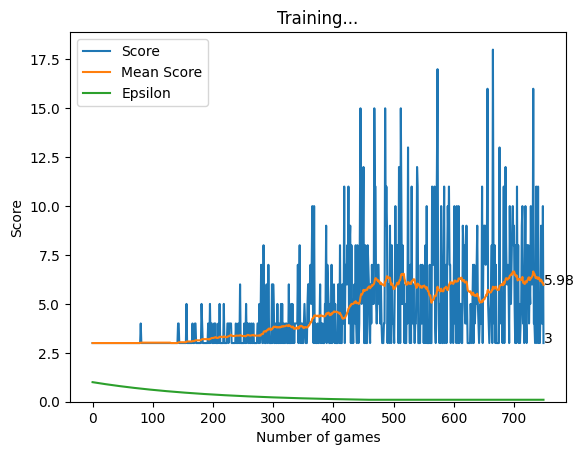

In [119]:
train_rl_agent(750, 250, game3, dqnagent15n, state_function_15, n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)

En este modelo de 15 neuronas también vemos un aprendizaje de la red, ligeramenta superior al de 8 neuronas, ya que su rango se mantiene en torno a los 5-7.

Esta media también es engañosa por el épsilon 0.1 pero así que es mejor hacer un evaluate..

In [121]:
dqnagent15n.epsilon = 0

game3.state.reset()
game3.play_with_pygame()

Si vemos su partida podemos observar un gameplay un poco distinto al del de 8 neuronas, ya que el otro iba de manera más lineal y no jugaba tanto a enrollarse. Este modelo se enrolla mucho para no morir aunque suele morir dividiendo el mapa con su cuerpo en dos partes y no pudiendo escapar de ahí.


Hemos visto que este modelo se puede llegar a quedar en bucles así que le hemos puesto un epsilon de 0.001 por si acaso se queda pillado. 
Por lo general vemos una mejor media que en las otras redes, siendo esta de 31 frente a la media de 20 de la de 8 neuronas.

In [122]:
dqnagent15n.epsilon = 0.001
game3.evaluar(100)

100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


{'puntuacion_media': np.float64(27.28),
 'puntuacion_maxima': np.int64(40),
 'puntuacion_minima': np.int64(4),
 'movimientos_medios': np.float64(382.3),
 'movimientos_maximos': np.int64(3251),
 'movimientos_minimos': np.int64(18),
 'movimientos por puntuacion': 14,
 'proporcion_del_tablero_ocupada': 0.32}

### 2.4. Cargar modelos con los que hemos jugado nosotros.
Por si quieres probar los modelos con los que hemos jugado.

In [123]:
# MODELO 15 NEURONAS

load_dqnagent1 = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.025,         
    epsilon_decay=0.995,        
    learning_rate=0.0005,       
    input_dim=15,               
    hidden_dim=256,
    n_actions=4,      
    batch_size=128,             
    mem_size=50000,             
    target_update_freq=1000,    
    checkpoint_dir='new_checkpoints',
    state_function=state_function_15
)

# Ruta al checkpoint que deseas cargar (carpeta de checkpoints)
checkpoint_path = 'checkpoints/dqn15N_ep750_sc6.04.pth'

load_dqnagent1.load_checkpoint(checkpoint_path)
load_dqnagent1.epsilon = 0.001


Checkpoint loaded from Episode 750 with Mean Score 6.04


c:\Users\alvar\OneDrive\Escritorio\practica_3_ALN\dependencias\Agentes\deep_q_agent.py:154: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_

**Si se queda en bucle sube el epsilon a 0.001-0.005, bajará un poco la media pero escapará de bucles**

In [124]:
game_load1 = juegorl.Snake_game((10, 10), 1, load_dqnagent1)

game_load1.evaluar(100)

100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


{'puntuacion_media': np.float64(32.1),
 'puntuacion_maxima': np.int64(48),
 'puntuacion_minima': np.int64(4),
 'movimientos_medios': np.float64(362.1),
 'movimientos_maximos': np.int64(2558),
 'movimientos_minimos': np.int64(19),
 'movimientos por puntuacion': 11,
 'proporcion_del_tablero_ocupada': 0.4}

In [125]:
game_load1.state.reset()
game_load1.play_with_pygame()

In [126]:
# MODELO 8 NEURONAS
load_dqnagent2 = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.025,          # Valor mínimo de epsilon ajustado a 0.025
    epsilon_decay=0.995,        # Decaimiento más lento
    learning_rate=0.0005,       # Tasa de aprendizaje ajustada
    input_dim=8,               # Actualizado según la nueva representación del estado
    hidden_dim=128,
    n_actions=4,      
    batch_size=128,             # Aumentado de 64 a 128
    mem_size=50000,             # Aumentado de 10000 a 50000
    target_update_freq=1000,    # Actualizado para coincidir con el scheduler
    checkpoint_dir='new_checkpoints',
    state_function=state_function_8n
)

# Ruta al checkpoint que deseas cargar
checkpoint_path = 'checkpoints/dqn8N_ep500_sc4.68.pth'

load_dqnagent2.load_checkpoint(checkpoint_path)
load_dqnagent2.epsilon = 0


Checkpoint loaded from Episode 500 with Mean Score 4.68


**Si se queda en bucle sube el epsilon a 0.001-0.005, bajará un poco la media pero escapará de bucles**

In [127]:
game_load2 = juegorl.Snake_game((10, 10), 1, load_dqnagent2)

game_load2.evaluar(100)

100%|██████████| 100/100 [00:01<00:00, 54.46it/s]


{'puntuacion_media': np.float64(20.76),
 'puntuacion_maxima': np.int64(36),
 'puntuacion_minima': np.int64(8),
 'movimientos_medios': np.float64(157.05),
 'movimientos_maximos': np.int64(383),
 'movimientos_minimos': np.int64(26),
 'movimientos por puntuacion': 8,
 'proporcion_del_tablero_ocupada': 0.26}

In [128]:
game_load2.state.reset()
game_load2.play_with_pygame()

## 3. Conclusiones
Los Agentes entrenados mediante aprendizaje reforzado no son tan potentes como los que siguen heurísticas, pero creemos que son muy interesantes y que tienen mucho potencial de mejora si se optimizan bien los parámetros y se define un buen conjunto de neuronas.

# Módulo 3: Multijugador


Hasta el momento hemos podido comparar estrategias entre ellas, valorando cuales obtienen mejores resultados en partidas unijugador. Podría ser intuitivo pensar que las buenas estrategias del modo unijugador seguirán siendo buenas en el modo multijugador pero ¿es esto cierto en el Snake? <br>
... <br>
Para responder a esta pregunta hemos reprogramado el archivo **juego_base.py** para que pueda soportar varios agentes. El nuevo archivo tiene como nombre **juego_base_multijugador.py** (muy intuitivo). Los principales cambios realizados son los que siguen:
<br>
<img src= "media\imagenes\FormatoSnake.png" width= 370 style="float: right;">

1. La información de las serpientes, que antes era una lista de tuplas con coordenadas, ahora es una lista de listas de tuplas, donde cada lista contiene una serpiente diferente. *(ver figura a la derecha)* ------->

2. Creamos una lista con todos los agentes, que podemos iterar para obtener la acciones que realizan en cada ronda.

3. Los agentes necesitan tener algo que los identifique, por eso se añaden **números ID**. Al invocar un agente, debes meter un número ID único que lo distinga del resto. De esta forma, podemos realizar eliminaciones de agentes por ID o mostrar el ganador al final de una partida.

4. El método upload(action) pasa a recibir una lista de acciones en vez de una única acción, y actúa cambiando el estado del tablero cuando las serpientes realizan esas acciones.

5. La nueva variable **self.bodies** contiene las coordenadas de TODOS los cuerpos. Así, es fácil comprender cuando una <br> serpiente choca con una porción de cuerpo, dando igual a quién le pertenezca el cacho.

6. Las posiciones de comienzo de los agentes varían con respecto al número de agentes usados. Hasta 4 agentes, se rellenan las esquinas del tablero. De 4 a 8 agentes se añaden puntos de comienzo en las mitades de los lados.

7. La condición de victoria ahora es aguantar hasta que el resto de serpientes mueran y ser el último en el tablero. Esto se da cuando la longitud de la lista de snakes es 1, que se traduce en un solo jugador. Cuando esto ocurre, el juego acaba y se devuelve el ID de la serpiente ganadora.

8. Como detalle estético, usamos los IDs multplicados por ciertas cantidades para establecer el código RGB de los agentes. Puesto que cada agente tiene un ID único, el color de su cuerpo también lo será y se mostrará diferente al resto durante la partida.

*NOTA: Cuando dos serpientes choquen sus cabezas, la más grande se comerá a la pequeña.*

Con todos estos cambios hechos, obtenemos un juego base capaz de gestionar los agentes. Ahora, toca ajustar los agentes para que tengan en cuenta el resto de cuerpos aparte del propio, y sepan actuar al respecto. <br>
Los cambios que se realizan en la heurística de los agentes son triviales, pues solo hay que usar la lista de bodies para entender las posiciones del resto de jugadores, y los pesos se distribuyen de forma consecuente al tipo de heurística.

### Avoider Multijugador
Cambiando el modelo **avoider** obtenemos el increíble **AVOIDER MULTIJUGADOR** (sí, en mayúsculas). Actúa igual que el avoider, pero adaptado para poder interactuar con otros agentes. <br>
Ejecuta la siguiente celda para probar la **primera partida multijugador**.

In [129]:
import dependencias

# Definimos nuestros agentes
Borja = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(4321)
Benjamin = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(1234)

# Creamos el juego
game = dependencias.Snake_game_MultiPlayer((25, 25), 40, [Borja, Benjamin])  # Ponemos mucha comida, para que se la encuentren sin querer

# Ejecutamos
game.play_with_pygame()

El ganador es: Snake4321


No hay gran cambio en como actúan con respecto a partidas de un jugador, puesto que no tienen muchas cosas en cuenta.

### Chaser Multijugador
Con un par de cambios en el modelo **chaser** obtenemos nuestro primer **CHASER MULTIJUGADOR**. Veamos una partida entre ellos.

In [132]:
import dependencias

# Definimos nuestros agentes
Ortega = dependencias.Agentes_multiplayer.ChaserAgentMp(231)
Gasset = dependencias.Agentes_multiplayer.ChaserAgentMp(728)

# Creamos el juego
game = dependencias.Snake_game_MultiPlayer((25, 25), 5, [Ortega, Gasset])

# Ejecutamos
game.play_with_pygame()  # Es normal que las partidas acaben casi instantáneamente, pues estos agentes no saben esquivar la muerte.

El ganador es: Snake728


Efectivamente, los chaser siguen siendo "malos" pues no evitan la muerte.

## Combinación de Agentes

### Chowder Multijugador

Como se pudo ver en el módulo de agentes de un solo jugador, las mejores estrategias surgen de mezclar otras más pequeñas. Implementemos eso en multijugador. La mecánica será la misma, mediante unos pesos se hacen sumas ponderadas de las heurísticas y se elige la opción más puntuada. Probemos a mergear un AVOIDER MULTIPLAYER con un CHASER MULTIPLAYER, creando un **CHOWDER MULTIPLAYER**. <br>
Ahora vamos a enfrentar dos de estos modelos usando distintos pesos. <br> <br>
*Nota: Como se aprecia en el código, tanto el agente combinado como sus subagentes deben usar el mismo ID para que el código funcione y se asocien entre ellos*

In [134]:
import dependencias

Ortega1 = dependencias.Agentes_multiplayer.ChaserAgentMp(33333)
Borja1 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(33333)
Ortega2 = dependencias.Agentes_multiplayer.ChaserAgentMp(44444)
Borja2 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(44444)

chowder = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega1, Borja1], weights = (0.5, 1), id = 33333)  # Combinamos con pesos
chowdar = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega2, Borja2], weights = (1, 0.5), id = 44444)


game = dependencias.Snake_game_MultiPlayer((25, 25), 5, [chowder, chowdar])

game.play_with_pygame()

El ganador es: Snake33333


Se empiezan a ver resultados. Estos agentes ya empiezan a ser relativamente buenos, evitando la muerte y persiguiendo la comida. Solo con esto, ya podemos enfrentar muchos agentes combinados con distintos pesos para ver las mezclas que más funcionan. Aprovechemos el momento también para ampliar el número de jugadores. Veamos una partida entre 5 jugadores.

In [135]:
import dependencias

Ortega1 = dependencias.Agentes_multiplayer.ChaserAgentMp(11)
Borja1 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(11)
Ortega2 = dependencias.Agentes_multiplayer.ChaserAgentMp(22)
Borja2 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(22)
Ortega3 = dependencias.Agentes_multiplayer.ChaserAgentMp(33)
Borja3 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(33)
Ortega4 = dependencias.Agentes_multiplayer.ChaserAgentMp(44)
Borja4 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(44)
Ortega5 = dependencias.Agentes_multiplayer.ChaserAgentMp(55)
Borja5 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(55)

chowder1 = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega1, Borja1], weights = (0.5, 1), id = 11)
chowder2 = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega2, Borja2], weights = (0.5, 1.2), id = 22)
chowder3 = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega3, Borja3], weights = (0.3, 1.1), id = 33)
chowder4 = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega4, Borja4], weights = (0.4, 0.9), id = 44)
chowder5 = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega5, Borja5], weights = (0.6, 1.5), id = 55)

game = dependencias.Snake_game_MultiPlayer((40, 40), 15, [chowder1, chowder2, chowder3, chowder4, chowder5])

game.play_with_pygame()

El ganador es: Snake55


### Deep-Chowder y Tail-Chasser


Mezclando el Chowder con un modelo de búsqueda profunda obtenemos Deep-Chowder. Vamos a probarlo enfrentandolo contra un chowder normal.

In [136]:
import dependencias

Ortega1 = dependencias.Agentes_multiplayer.ChaserAgentMp(11)
Borja1 = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(11)
chowder1 = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [Ortega1, Borja1], weights = (0.5, 1), id = 11)

avoider = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(69)
deeper = dependencias.Agentes_multiplayer.Busqueda_anchura_Mp(69)
chaser = dependencias.Agentes_multiplayer.ChaserAgentMp(69)

deep_chowder = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [avoider, deeper, chaser], weights = (1, 2, 0.5), id = 69)

game = dependencias.Snake_game_MultiPlayer((25, 25), 5, [chowder1, deep_chowder])

game.play_with_pygame()  # Suele ganar el modelo Deep_Chowder (Snake69)

El ganador es: Snake69


El modelo Deep_Chowder sale de manera satisfactoria de las situaciones complicadas que le genera la otra serpiente. Salvo en situaciones contadas de mala suerte, Deep_Chowder se libra de encerronas de Chowder, mientras que a la inversa no ocurre.
<br><br>
Entre tantas pruebas se va visualizando una conclusión final. Efectivamente, los modelos buenos unijugador acaban siendo buenos también contra otros jugadores. Cuánto más trabajamos en los parámetros de un modelo, los ajustamos, y usamos distintos sub-agentes, mejor acaba siendo el modelo al enfrentarlo contra otros jugadores. <br>
<br>
Implementamos el Tail_Chasser y lo probamos añadiéndolo a Deep_Chowder. 

In [137]:
import dependencias

tail_chasser = dependencias.Agentes_multiplayer.Tail_Chasser_Mp(99)
avoiderh = dependencias.Agentes_multiplayer.Avoid_inmediate_death_Mp(99)
deeperh = dependencias.Agentes_multiplayer.Busqueda_anchura_Mp(99)
chaserh = dependencias.Agentes_multiplayer.ChaserAgentMp(99)

deep_chowder_tail = dependencias.Agentes_multiplayer.Combined_agent_Mp(agentes = [avoiderh, deeperh, chaserh, tail_chasser], weights = (1, 2, 0.5, 3), id = 99)

game = dependencias.Snake_game_MultiPlayer((25, 25), 5, [chowder1, chowder2, deep_chowder, deep_chowder_tail])  # Lo enfrentamos contra chowders y deepchowders 

game.play_with_pygame()

El ganador es: Snake11


En el caso del Tail_Chasser, podemos observar que pese a ser muy bueno en unijugador no aporta mucho en multijugador pues las situaciones con poco espacio (donde es bueno este modelo) casi no se producen.

## Reflexión Final

Hemos comprobado la hipótesis propuesta al inicio del módulo. Sin embargo, en el proceso de construir este trabajo, descubrimos que el juego Snake encierra una profundidad insospechada. Lo que parecía un simple ejercicio técnico nos abrió las puertas a un vasto campo de estudio: desde las relaciones entre distintos modelos de serpientes hasta la influencia decisiva de las características del tablero en el rendimiento de estas.

Snake, un juego que inicialmente concebimos como un tablero de píxeles con reglas sencillas, resultó ser un microcosmos de posibilidades. ¿No es fascinante cómo un sistema tan pequeño puede encapsular principios aplicables a problemas más grandes, incluso personales? Quizás, en cada giro y movimiento de la serpiente, se esconden patrones que resuenan con la forma en que enfrentamos desafíos, tomamos decisiones y navegamos por la incertidumbre de la vida misma. Quizás, Eva solo intentaba seguir los pasos de un ente omnipotente con conocimientos ancestrales.

Al final, tal vez Snake nunca fue solo un juego. Tal vez sea una metáfora: una lección sobre cómo incluso los sistemas más aparentemente simples contienen complejidades que nos desafían a mirar más allá de lo evidente, a ser pacientes, estratégicos, y, sobre todo, humildes ante lo que creíamos entender por completo. Porque, al igual que la serpiente, nosotros también seguimos creciendo, aprendiendo y buscando el equilibrio en cada movimiento.
<br>

<center>
<b>Un trabajo por:</b> <br><br>
Álvaro Ramiro <br>

Jordi Hamberg <br>

Héctor Sancho <br><br>

 <br><br>
<img src= "media\imagenes\Logo.jpg" width = 300>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<i>Larga vida a Senollop co.</i>
</center>

